# Homework 3

Author: Sherry

E3 (c)

In [1]:
import numpy as np
def update(state,T):
    try:
        partition=np.cumsum(T[state])
        random=np.random.uniform(0,1)
        new_state=len(partition[partition<random])
        return(new_state)
    except IndexError:
        print('The state is not valid. Please enter a state between 0 and {}'\
              .format(len(T)-1))

current_state=1
T=np.array([[0,0.5,0.5], [0.3,0.3,0.4],[0.2,0.4,0.4]])
update(current_state,T)

2

Explain:
The code defines a method to transit the current state to the next state by the transition matrix T. We store the current state in the variable current_state and the transition matrix in the T. The updatae(state, T) method first use “T[state]” to get the probabilities for the current state to go to other states. The “np.cumsum” will calculate the cumulative sum of the elements along the row. We assign the value to “partition”. Then we generate a uniform random number between [0,1] and assign it to “random”. The next step is to use “partition < random” to find out which part of the “partition” the uniform random number is in, and use “len(partition[partition < random])” to find the next state. Assume partition=[0.3 0.6 1.0], the logic is that if random number < 0.3, the next state is 0; if 0.3 < random number < 0.6, the next state is 1; if 0.6 < random number < 1.0, the next state is 2. Then we assign the value to new_state and return it. In addition, the code will check if the input current state is valid or not. It checks the dimension of transition matrix T and if the input current state is outside the state space, it will throw an IndexError and output “The state is not valid. Please enter a state between 0 and (dimension of T - 1)”.

E3 (d)

S 0 = 100
S 1 = 110.0
S 2 = 121.0
S 3 = 133.1
S 4 = 122.452
S 5 = 122.452
S 6 = 122.452
S 7 = 112.65584
S 8 = 112.65584
S 9 = 112.65584
S 10 = 112.65584
S 11 = 123.921424
S 12 = 136.3135664
S 13 = 149.94492304
S 14 = 164.939415344
S 15 = 181.433356878
S 16 = 199.576692566
S 17 = 199.576692566
S 18 = 219.534361823
S 19 = 241.487798005
S 20 = 265.636577806
S 21 = 244.385651581
S 22 = 244.385651581
S 23 = 224.834799455
S 24 = 206.848015498
S 25 = 190.300174258
S 26 = 190.300174258
S 27 = 209.330191684
S 28 = 230.263210853
S 29 = 253.289531938
S 30 = 278.618485132
S 31 = 306.480333645
S 32 = 337.12836701
S 33 = 370.84120371
S 34 = 407.925324082
S 35 = 375.291298155
S 36 = 345.267994303
S 37 = 379.794793733
S 38 = 417.774273106
S 39 = 459.551700417
S 40 = 505.506870458
S 41 = 556.057557504
S 42 = 611.663313255
S 43 = 672.82964458
S 44 = 740.112609038
S 45 = 814.123869942
S 46 = 895.536256936
S 47 = 985.08988263
S 48 = 906.282692019
S 49 = 996.910961221
S 50 = 1096.60205734
S 51 = 1096.60205

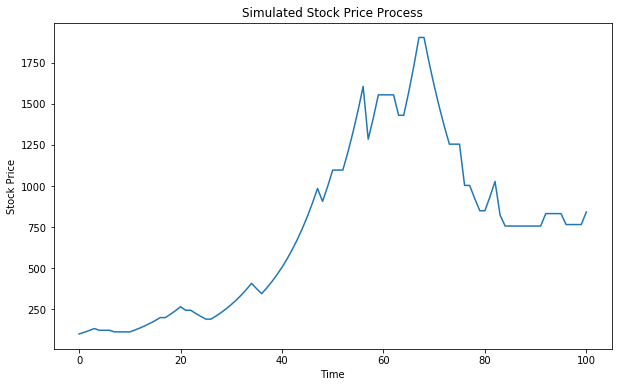

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the update() function to generate stock price process
def update(state0,T,N,price_change,S0):
    try:
        state=state0
        S=S0
        i=1
        v=[]
        v.append(S)
        while i<=N:
            partition=np.cumsum(T[state])
            random=np.random.uniform(0,1)
            state=len(partition[partition<random])
            S=S*price_change[state]
            v.append(S)
            i=i+1
        return v
    except IndexError:
        print('The state is not valid. Please enter a state between 0 and {}'\
              .format(len(T)-1))

# Input data
state0=0                                # Initial state
T=np.array([[0.7,0.1,0.1,0.1], [0.2,0.4,0.4,0],[0.1,0.1,0.7,0.1],[1/3,1/3,1/3,0]])
N=100                                   # Number of time steps
price_change=np.array([1.1,0.92,1,0.8]) # Price change vector
S0=100                                  # Initial stock price

# Generate the stock prices and output them
v=update(state0,T,N,price_change,S0)    # v stores the prick processes that 
                                        # follows the markov chain dynamics
j=0
for item in v:
    print("S",j,"=",item)
    j=j+1

# Draw the graph
y = v
x = range(0,len(y))
plt.figure(figsize=(10, 6))
plt.plot(x,y,'')  
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Simulated Stock Price Process')
plt.show()